In [5]:
import pandas as pd

# Cargar los datos desde los archivos CSV
cash_requests_df = pd.read_csv('../../project-1-ironhack-payments-es/project_dataset/extract - cash request - data analyst.csv')
fees_df = pd.read_csv('../../project-1-ironhack-payments-es/project_dataset/extract - fees - data analyst - .csv')

# Convertir las columnas de fecha a datetime
cash_requests_df['created_at'] = pd.to_datetime(cash_requests_df['created_at'], utc=True)
fees_df['created_at'] = pd.to_datetime(fees_df['created_at'], utc=True)

# Crear columna de cohorte en cash_requests_df basada en la fecha de la primera solicitud de cada usuario
cash_requests_df['cohort'] = cash_requests_df.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


/var/folders/8d/_dfy3v191xq4fpx56kpljr380000gn/T/ipykernel_6942/2726614458.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_requests_df['cohort'] = cash_requests_df.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


In [6]:
# Unir fees_df con cash_requests_df usando 'cash_request_id' y 'id'
fees_df = fees_df.merge(cash_requests_df[['id', 'cohort']], left_on='cash_request_id', right_on='id', how='left')

In [7]:
# Filtrar las tarifas para excluir las que tienen estado 'rejected' o 'cancelled'
fees_df = fees_df[~fees_df['status'].isin(['rejected', 'cancelled'])]

In [8]:
# Calcular los ingresos generados por cada cohorte
cohort_revenue = fees_df.groupby('cohort')['total_amount'].sum().reset_index()
cohort_revenue.columns = ['Cohorte', 'Ingresos Generados']


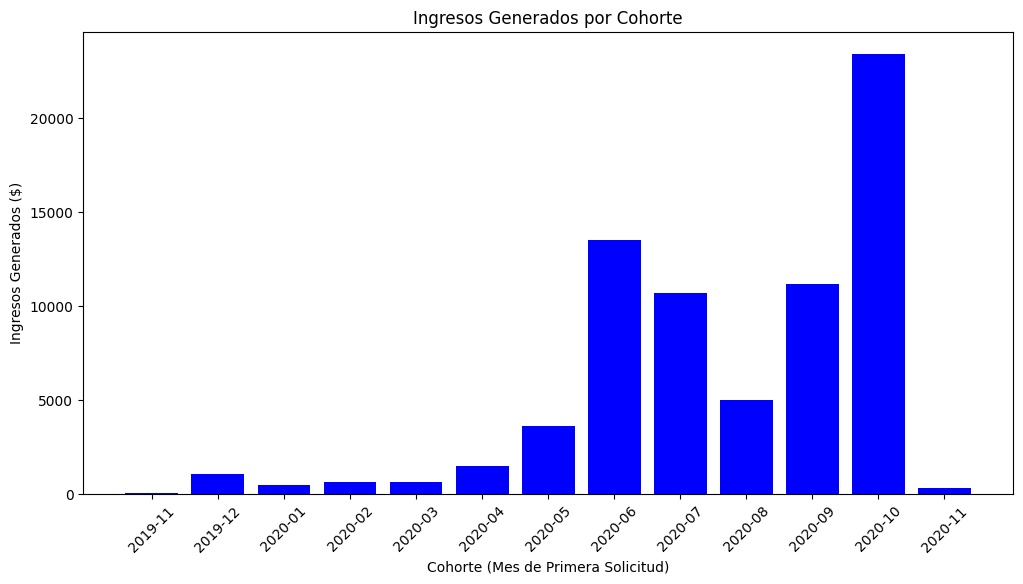

In [9]:
import matplotlib.pyplot as plt

# Graficar los ingresos por cohorte
plt.figure(figsize=(12, 6))
plt.bar(cohort_revenue['Cohorte'].astype(str), cohort_revenue['Ingresos Generados'], color='blue')
plt.xlabel('Cohorte (Mes de Primera Solicitud)')
plt.ylabel('Ingresos Generados ($)')
plt.title('Ingresos Generados por Cohorte')
plt.xticks(rotation=45)
plt.show()